First 5 rows of the data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Info about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   

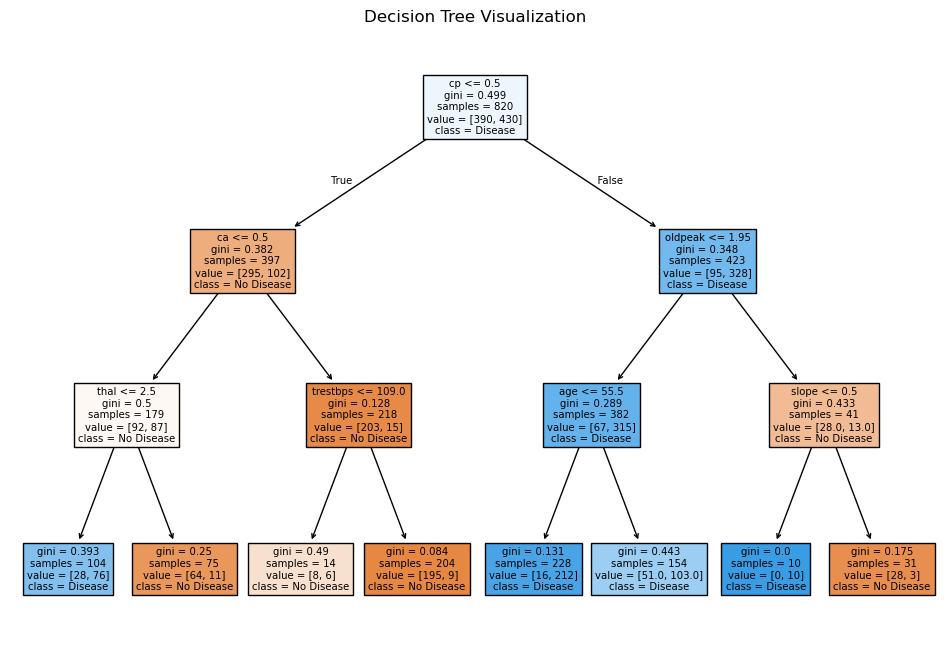


✅ Random Forest Accuracy: 1.0


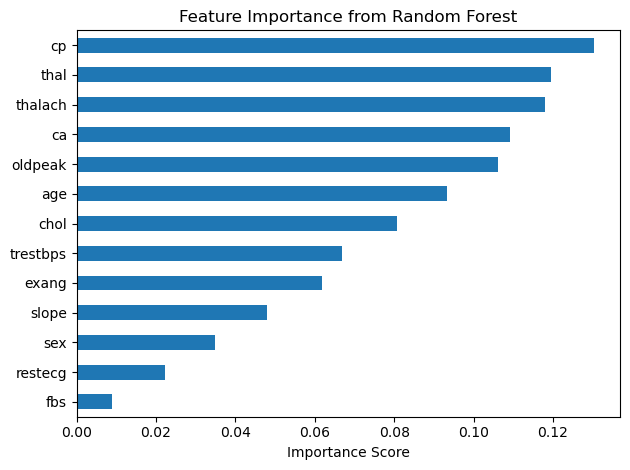

In [3]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading dataset 
file_path = r"D:\Elevate Labs Internship\Heart Desease Dataset Task 05.csv"
data = pd.read_csv(file_path)

# Understanding data
print("First 5 rows of the data:")
print(data.head())
print("\nInfo about the data:")
print(data.info())

# Preparing input and output
X = data.drop(columns='target')  # features
y = data['target']               # label

# Spliting data to training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training decision Tree 
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("\n✅ Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))

# Visualizing decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Training forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\n✅ Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Featuring importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance from Random Forest')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
